# Задание

Для заданного набора данных (по Вашему варианту) постройте модели классификации или регрессии (в зависимости от конкретной задачи, рассматриваемой в наборе данных). Для построения моделей используйте методы 1 и 2 (по варианту для Вашей группы). Оцените качество моделей на основе подходящих метрик качества (не менее двух метрик). Какие метрики качества Вы использовали и почему? Какие выводы Вы можете сделать о качестве построенных моделей? Для построения моделей необходимо выполнить требуемую предобработку данных: заполнение пропусков, кодирование категориальных признаков, и т.д.

|Метод 1|Метод 2|
|-------|-------|
|Линейная/логистическая регрессия|Градиентный бустинг|

Набор данных: https://www.kaggle.com/roysouravcu/forbes-billionaires-of-2021

# Ход выполнения работы

## Текстовое описание набора данных

Этот набор данных содержит список всех людей, отнесенных Forbes к категории миллиардеров 2021 года в их 35-м ежегодном списке миллиардеров мира.

Этот набор данных содержит «Имя каждого миллиардера», «Страна: они основаны!», «Источник их дохода / название компании», «Их собственный капитал, который делает их богаче, чем БЕДНЫЕ ЛЮДИ» и «Их глобальное положение с точки зрения их собственный капитал», «Отрасль»: в какой отрасли они работают? и их «Возраст».

Столбцы:

* `Name` – имя милиардера
* `NetWorth` – собственный капитал в миллиардах долларов США
* `Country` – страна проживания
* `Source` – источник дохода
* `Rank` – номер в рейтинге милиардеров
* `Age` – возраст милиардера
* `Industry` – сектор/индустрия/сегмент рынка, над которым работает миллиардер

## Основные характеристики набора данных

Подключаем все необходимые библиотеки

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib_inline
import matplotlib.pyplot as plt
from IPython.display import Image
from io import StringIO
import graphviz 
import pydotplus
from sklearn.model_selection import train_test_split
%matplotlib inline 
%matplotlib inline 
sns.set(style="ticks")
from IPython.display import set_matplotlib_formats
matplotlib_inline.backend_inline.set_matplotlib_formats("retina")

Подключаем Dataset

In [2]:
data = pd.read_csv('Billionaire.csv', sep=",")

Размер набора данных

In [3]:
data.shape

(2755, 7)

Типы колонок

In [4]:
data.dtypes

Name         object
NetWorth     object
Country      object
Source       object
Rank          int64
Age         float64
Industry     object
dtype: object

Проверяем, есть ли пропущенные значения

In [5]:
data.isnull().sum()

Name         0
NetWorth     0
Country      0
Source       0
Rank         0
Age         79
Industry     0
dtype: int64

Первые 8 строк датасета

In [6]:
data.head(8)

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,$177 B,United States,Amazon,1,57.0,Technology
1,Elon Musk,$151 B,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,$150 B,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,$124 B,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,$97 B,United States,Facebook,5,36.0,Technology
5,Warren Buffett,$96 B,United States,Berkshire Hathaway,6,90.0,Finance & Investments
6,Larry Ellison,$93 B,United States,software,7,76.0,Technology
7,Larry Page,$91.5 B,United States,Google,8,48.0,Technology


In [7]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 2755


Процент пропусков в `Age`

In [8]:
(79 / 2755) * 100

2.867513611615245

Настройка отображения графиков

In [9]:
# Задание формата графиков для сохранения высокого качества PNG
from IPython.display import set_matplotlib_formats
matplotlib_inline.backend_inline.set_matplotlib_formats("retina")
# Задание ширины графиков, чтобы они помещались на A4
pd.set_option("display.width", 70)

## Обработка прорпусков в данных

Поскольку процент пропусков очень маленький (≈ 3%), то строки, содержащие пропуски, можно удалить

In [10]:
# Удаление строк, содержащих пустые значения
data_no_null = data.dropna(axis=0, how='any')
(data.shape, data_no_null.shape)

((2755, 7), (2676, 7))

Выведем первые 8 строк набора данных

In [11]:
data_no_null.head(8)

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,$177 B,United States,Amazon,1,57.0,Technology
1,Elon Musk,$151 B,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,$150 B,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,$124 B,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,$97 B,United States,Facebook,5,36.0,Technology
5,Warren Buffett,$96 B,United States,Berkshire Hathaway,6,90.0,Finance & Investments
6,Larry Ellison,$93 B,United States,software,7,76.0,Technology
7,Larry Page,$91.5 B,United States,Google,8,48.0,Technology


In [12]:
total_count = data_no_null.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 2676


## Обрабогтка данных

### Очистка лишних символов

В столбце `NetWorth` содерится доход, но он представлен в виде строки, а не числом. Кромие того, в строке имеются лишние символы `$`, ` ` и `B`

In [13]:
data_fix = data_no_null.copy()
data_fix['NetWorth'] = data_fix['NetWorth'].str.replace('$', '', regex=False)
data_fix['NetWorth'] = data_fix['NetWorth'].str.replace(' B', '', regex=False)

In [14]:
data_fix.head(8)

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,177,United States,Amazon,1,57.0,Technology
1,Elon Musk,151,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,150,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,124,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,97,United States,Facebook,5,36.0,Technology
5,Warren Buffett,96,United States,Berkshire Hathaway,6,90.0,Finance & Investments
6,Larry Ellison,93,United States,software,7,76.0,Technology
7,Larry Page,91.5,United States,Google,8,48.0,Technology


Проверим типвы данных

In [15]:
data_fix.dtypes

Name         object
NetWorth     object
Country      object
Source       object
Rank          int64
Age         float64
Industry     object
dtype: object

Как видно, показатель дохода по прежнему является строкой не смотря на то, что он выглядит как число. Изменим тип дангных столбца.

In [16]:
data_fix['NetWorth'] = pd.to_numeric(data_fix['NetWorth'])

In [17]:
data_fix.dtypes

Name         object
NetWorth    float64
Country      object
Source       object
Rank          int64
Age         float64
Industry     object
dtype: object

Как видно, теперь все поля имеют правильные типы

In [18]:
data_fix.head(8)

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,177.0,United States,Amazon,1,57.0,Technology
1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,150.0,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,124.0,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,Technology
5,Warren Buffett,96.0,United States,Berkshire Hathaway,6,90.0,Finance & Investments
6,Larry Ellison,93.0,United States,software,7,76.0,Technology
7,Larry Page,91.5,United States,Google,8,48.0,Technology


### Кодирование категориальных признаков

Преобразуем имена, страны, ... в числовые зеачения (label encoding)

In [19]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [20]:
le = LabelEncoder()
    # "Name"
le.fit(data_fix.Name.drop_duplicates()) 
data_fix.Name = le.transform(data_fix.Name)
    # "Country"
le.fit(data_fix.Country.drop_duplicates()) 
data_fix.Country = le.transform(data_fix.Country)
    # "Source"
le.fit(data_fix.Source.drop_duplicates()) 
data_fix.Source = le.transform(data_fix.Source)
    # "Industry"
le.fit(data_fix.Industry.drop_duplicates()) 
data_fix.Industry = le.transform(data_fix.Industry)

### Масштабирование данных

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data_fix)
data_scalled = data_fix.copy()
data_scalled[data_scalled.columns] = sc1_data
data_scalled

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,0.379865,1.000000,0.956522,0.006608,0.000000,0.481481,0.941176
1,0.223802,0.852273,0.956522,0.157489,0.000374,0.382716,0.000000
2,0.082710,0.846591,0.231884,0.094714,0.000748,0.666667,0.235294
3,0.089072,0.698864,0.956522,0.105727,0.001122,0.580247,0.941176
4,0.569237,0.545455,0.956522,0.052863,0.001496,0.222222,0.941176
...,...,...,...,...,...,...,...
2750,0.172530,0.000000,0.115942,0.387665,1.000000,0.382716,0.941176
2751,0.981287,0.000000,0.115942,0.055066,1.000000,0.580247,0.588235
2752,0.983907,0.000000,0.115942,0.486784,1.000000,0.493827,0.705882
2753,0.988398,0.000000,0.115942,0.331498,1.000000,0.493827,0.117647


Построим кореляционную матрицу

<Axes: >

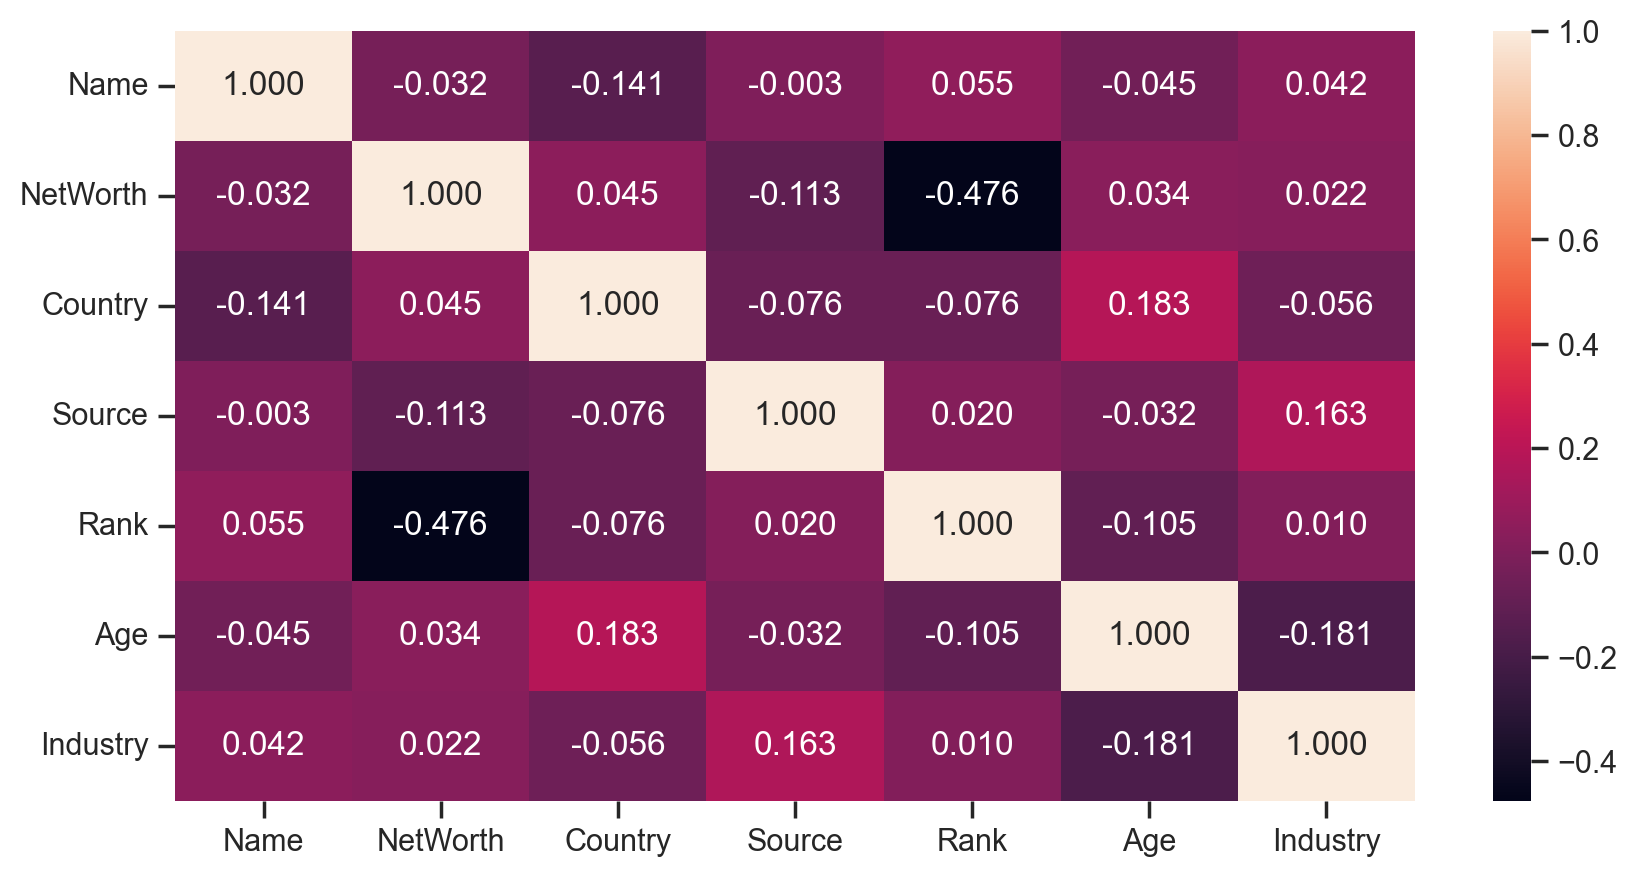

In [23]:
ig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(data_scalled.corr(method='pearson'), ax=ax, annot=True, fmt='.3f')

## Предсказание целевого признака

Предскажем значение целевого признака `Rank`.

### Разделение выборки на обучающую и тестовую

In [24]:
X = data_scalled.drop(columns='Rank')
Y = data_scalled['Rank']

Входные данные:

In [25]:
X.head()

,Name,NetWorth,Country,Source,Age,Industry
0,0.379865,1.000000,0.956522,0.006608,0.481481,0.941176
1,0.223802,0.852273,0.956522,0.157489,0.382716,0.000000
2,0.082710,0.846591,0.231884,0.094714,0.666667,0.235294
3,0.089072,0.698864,0.956522,0.105727,0.580247,0.941176
4,0.569237,0.545455,0.956522,0.052863,0.222222,0.941176


Выходные данные

In [26]:
Y.head()

0    0.000000
1    0.000374
2    0.000748
3    0.001122
4    0.001496
Name: Rank, dtype: float64

In [27]:
X_train,  X_test,  Y_train,  Y_test = train_test_split(X,  Y, random_state = 2022, test_size = 0.1)

Входные параметры обучающей выборки

In [28]:
X_train.head()

,Name,NetWorth,Country,Source,Age,Industry
518,0.151946,0.025568,0.463768,0.371145,0.555556,0.470588
2521,0.994012,0.001136,0.115942,0.294053,0.469136,0.588235
425,0.770958,0.030114,0.115942,0.701542,0.493827,0.117647
661,0.296781,0.019318,0.608696,0.453744,0.111111,0.352941
2722,0.429266,0.000000,0.637681,0.781938,0.703704,0.117647


Входные параметры тестовой выборки

In [29]:
X_test.head()

,Name,NetWorth,Country,Source,Age,Industry
10,0.032186,0.431818,0.797101,0.174009,0.827160,0.235294
1109,0.949850,0.010795,0.115942,0.212555,0.395062,0.000000
2483,0.602171,0.001136,0.956522,0.865639,0.395062,0.941176
1160,0.730913,0.010227,0.260870,0.344714,0.765432,0.235294
527,0.307260,0.025000,0.956522,0.182819,0.753086,0.352941


Выходные параметры обучающей выборки

In [30]:
Y_train.head()

518     0.187430
2521    0.889263
425     0.157127
661     0.244669
2722    1.000000
Name: Rank, dtype: float64

Выходные параметры тестовой выборки

In [31]:
Y_test.head()

10      0.003741
1109    0.397681
2483    0.889263
1160    0.415264
527     0.194164
Name: Rank, dtype: float64

### Линейная регрессия

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_blobs
from sklearn.metrics import mean_absolute_error, mean_squared_error

<Axes: xlabel='NetWorth', ylabel='Rank'>

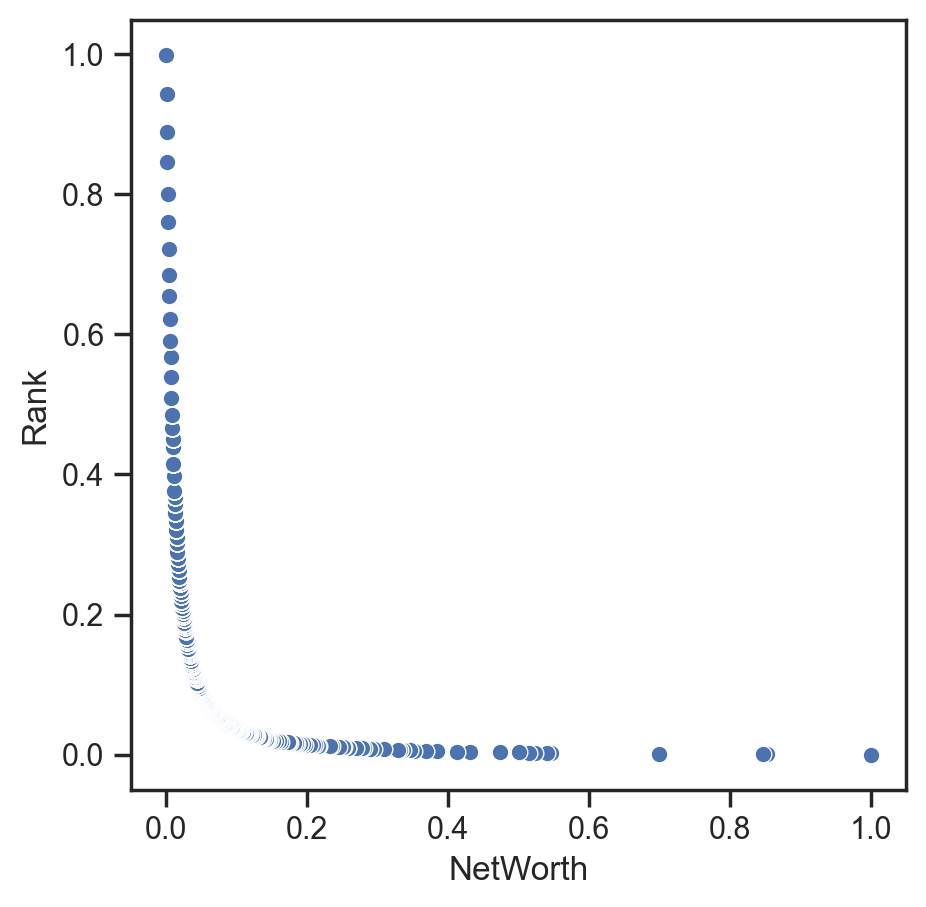

In [33]:
fig, ax = plt.subplots(figsize=(5,5)) 
sns.scatterplot(ax=ax, x=X['NetWorth'], y=Y)

Обучим линейную регрессию

In [34]:
reg1 = LinearRegression().fit(X, Y)

In [35]:
Y_pred_1 = reg1.predict(X_test)

Проверим результат на 2 метриках

In [36]:
mean_absolute_error(Y_test, Y_pred_1), mean_squared_error(Y_test, Y_pred_1)

(0.2051862943868395, 0.05685141353401008)

### Градиентный бустинг

In [37]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz

Обучим регрессор на 4 деревьях

In [38]:
ab1 = AdaBoostRegressor(n_estimators=4, random_state=2022)
ab1.fit(X, Y)

AdaBoostRegressor(n_estimators=4, random_state=2022)

Визуализируем обучающие деревья

In [39]:
# Визуализация дерева
def get_png_tree(tree_model_param, feature_names_param):
    dot_data = StringIO()
    export_graphviz(tree_model_param, out_file=dot_data, feature_names=feature_names_param,
                    filled=True, rounded=True, special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph.create_png()

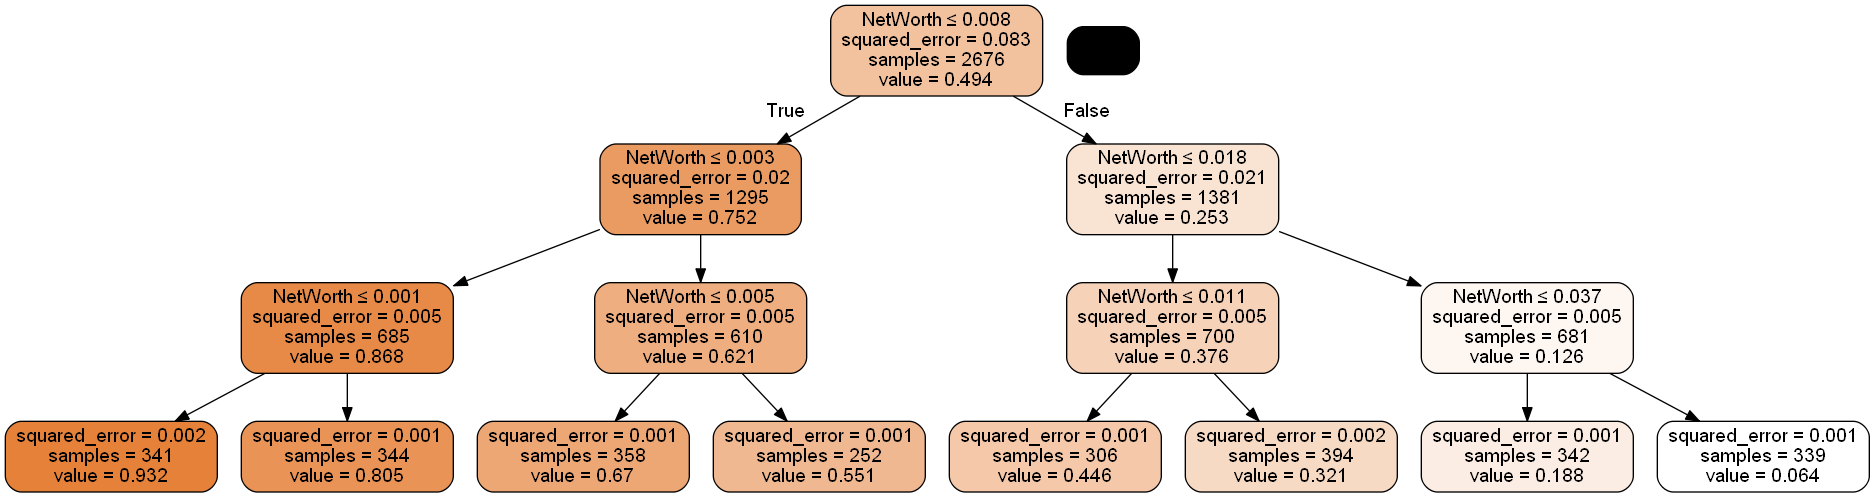

In [40]:
Image(get_png_tree(ab1.estimators_[0], X.columns), width="500")

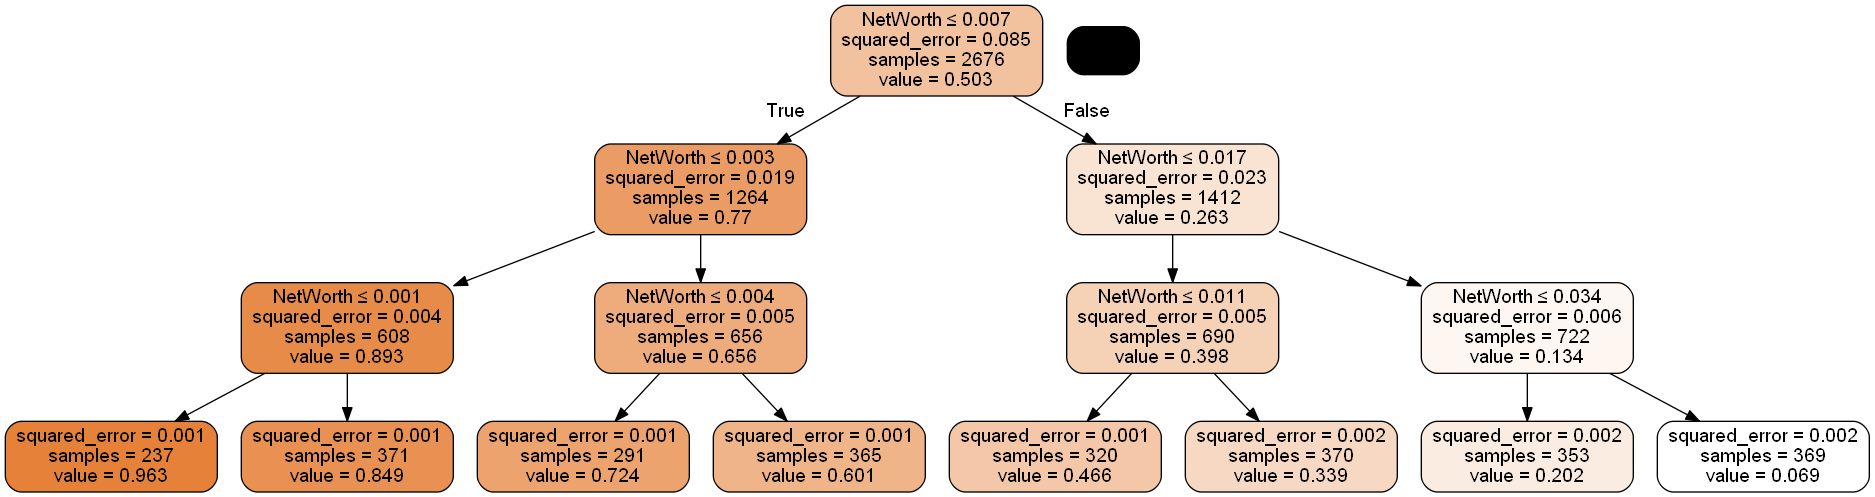

In [41]:
Image(get_png_tree(ab1.estimators_[1], X.columns), width="500")

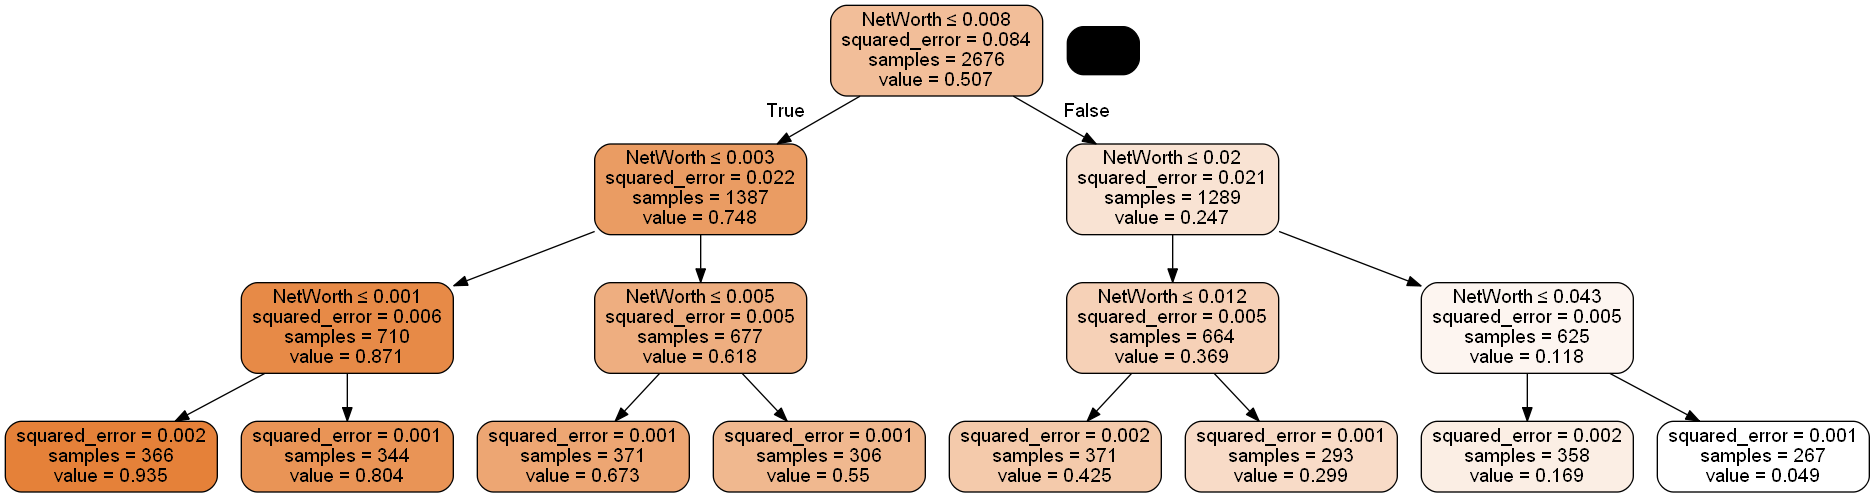

In [42]:
Image(get_png_tree(ab1.estimators_[2], X.columns), width="500")

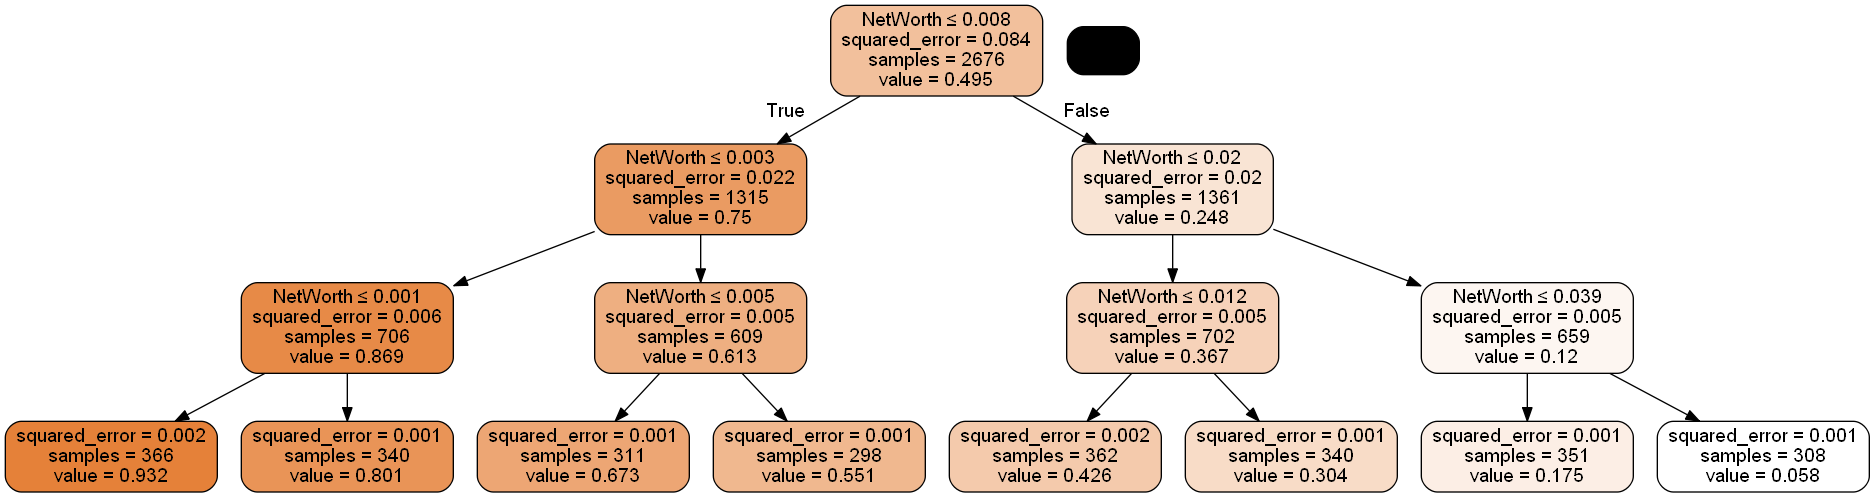

In [43]:
Image(get_png_tree(ab1.estimators_[3], X.columns), width="500")

In [44]:
regressor = AdaBoostRegressor(n_estimators=4, random_state=2022)
regressor.fit(X_train, Y_train)
y_pred = regressor.predict(X_test)

In [45]:
print('Mean Absolute Error:', mean_absolute_error(Y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test, y_pred)))

Mean Absolute Error: 0.03210150688221961
Mean Squared Error: 0.0013426872745400903
Root Mean Squared Error: 0.036642697424454036


Как видно, градиентный бустинг показало намного более лучшие результаты, чем линейная регрессия. Несмотря на то, что масштабировавние данных было выполнено (в обоих случаях).